In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)

set_matplotlib_formats('retina')


In [3]:
import os
import requests


key = os.environ['KAKAO_REST_API_KEY']

In [4]:
shelter = pd.read_csv('전국지진해일대피소표준데이터.csv', encoding = "CP949")

In [5]:
shelter.shape

(10305, 30)

In [6]:
shelter.head()

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,...,해발높이,지진대피안내표지판수,긴급대피장소안내표지판수,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 29
0,내수2근린공원,지진대피소,옥외대피소,공원,서울특별시 종로구 경희궁4길,서울특별시 종로구 내수동 73-3,37.572387,126.971583,2192.0,664.0,...,NaN,NaN,NaN,NaN,종로구청,02-2148-2483,2018-08-14,3000000,서울특별시 종로구,NaN
1,대동세무고등학교,지진대피소,옥외대피소,운동장,서울특별시 종로구 계동길 84-10,NaN,37.581920,126.987930,2000.0,1000.0,...,NaN,NaN,NaN,NaN,종로구청,02-2148-2483,2018-08-14,3000000,서울특별시 종로구,NaN
2,대신고등학교,지진대피소,옥외대피소,운동장,서울특별시 종로구 사직로 9,NaN,37.572915,126.961601,4663.0,1413.0,...,NaN,NaN,NaN,NaN,종로구청,02-2148-2483,2018-08-14,3000000,서울특별시 종로구,NaN
3,덕성여자고등학교,지진대피소,옥외대피소,운동장,서울특별시 종로구 율곡로3길 50,NaN,37.577918,126.982867,4180.0,1260.0,...,NaN,NaN,NaN,NaN,종로구청,02-2148-2483,2018-08-14,3000000,서울특별시 종로구,NaN
4,덕성여자중학교,지진대피소,옥외대피소,운동장,서울특별시 종로구 율곡로3길 49,NaN,37.577945,126.981778,6701.0,2030.0,...,NaN,NaN,NaN,NaN,종로구청,02-2148-2483,2018-08-14,3000000,서울특별시 종로구,NaN


In [7]:
shelter.columns

Index(['지진해일대피소명', '지진해일대피소구분', '지진해일대피소유형', '지진해일대피소유형구분', '소재지도로명주소',
       '소재지지번주소', '위도', '경도', '수용가능면적', '최대수용인원수', '지진해일대피소운영상태',
       '지진해일대피소전화번호', '부대편의시설', '주민대피지구명', '주민대피지구내가구수', '주민대피지구내거주인수',
       '주민대피지구내재해약자수', '내진적용여부', '내진설계등급', '해안선이격거리', '해발높이', '지진대피안내표지판수',
       '긴급대피장소안내표지판수', '지진대피로안내표지판수', '관리기관명', '관리기관전화번호', '데이터기준일자', '제공기관코드',
       '제공기관명', 'Unnamed: 29'],
      dtype='object')

In [7]:
shelter.isnull().sum()

지진해일대피소명            0
지진해일대피소구분           0
지진해일대피소유형           0
지진해일대피소유형구분         0
소재지도로명주소          926
소재지지번주소          5684
위도                 92
경도                 91
수용가능면적              0
최대수용인원수             0
지진해일대피소운영상태         0
지진해일대피소전화번호         0
부대편의시설           9861
주민대피지구명             0
주민대피지구내가구수       9763
주민대피지구내거주인수      9870
주민대피지구내재해약자수    10023
내진적용여부              0
내진설계등급          10021
해안선이격거리          9348
해발높이             9274
지진대피안내표지판수       7502
긴급대피장소안내표지판수     9270
지진대피로안내표지판수      9684
관리기관명               0
관리기관전화번호         3749
데이터기준일자             0
제공기관코드              0
제공기관명               0
Unnamed: 29     10305
dtype: int64

In [5]:
shelter['소재지도로명주소'] = shelter['소재지도로명주소'].fillna('정보없음')

In [6]:
shelter['소재지도로명주소']

0            서울특별시 종로구 경희궁4길
1        서울특별시 종로구 계동길 84-10
2            서울특별시 종로구 사직로 9
3         서울특별시 종로구 율곡로3길 50
4         서울특별시 종로구 율곡로3길 49
                ...         
10300                   정보없음
10301                   정보없음
10302                   정보없음
10303                   정보없음
10304     대구광역시 수성구 범안로4길 46
Name: 소재지도로명주소, Length: 10305, dtype: object

In [7]:
shelter.isnull().sum()

지진해일대피소명            0
지진해일대피소구분           0
지진해일대피소유형           0
지진해일대피소유형구분         0
소재지도로명주소            0
소재지지번주소          5684
위도                 92
경도                 91
수용가능면적              0
최대수용인원수             0
지진해일대피소운영상태         0
지진해일대피소전화번호         0
부대편의시설           9861
주민대피지구명             0
주민대피지구내가구수       9763
주민대피지구내거주인수      9870
주민대피지구내재해약자수    10023
내진적용여부              0
내진설계등급          10021
해안선이격거리          9348
해발높이             9274
지진대피안내표지판수       7502
긴급대피장소안내표지판수     9270
지진대피로안내표지판수      9684
관리기관명               0
관리기관전화번호         3749
데이터기준일자             0
제공기관코드              0
제공기관명               0
Unnamed: 29     10305
dtype: int64

In [8]:
gj = shelter[shelter['소재지도로명주소'].str.contains('광주광역시')]
gj.shape

(94, 30)

In [12]:
gj.head()

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,...,해발높이,지진대피안내표지판수,긴급대피장소안내표지판수,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 29
741,광주학강초등학교 운동장,지진대피소,옥외대피소,운동장,광주광역시 남구 양림로 92 (양림동),NaN,35.138026,126.918254,7200.00,2181.0,...,NaN,NaN,NaN,NaN,광주광역시 남구청,062-607-2942,2019-04-02,3610000,광주광역시 남구,NaN
742,방림초등학교 운동장,지진대피소,옥외대피소,운동장,광주광역시 남구 큰방림길 20 (방림동),NaN,35.133504,126.920998,1952.00,591.0,...,NaN,NaN,NaN,NaN,광주광역시 남구청,062-607-2942,2019-04-02,3610000,광주광역시 남구,NaN
743,봉선중학교 운동장,지진대피소,옥외대피소,운동장,광주광역시 남구 봉선중길 14 (봉선동),NaN,35.129475,126.912499,5512.75,1670.0,...,NaN,NaN,NaN,NaN,광주광역시 남구청,062-607-2942,2019-04-02,3610000,광주광역시 남구,NaN
744,봉선초등학교 운동장,지진대피소,옥외대피소,운동장,광주광역시 남구 봉선중앙로118번길 4 (봉선동),NaN,35.131125,126.911755,3030.00,918.0,...,NaN,NaN,NaN,NaN,광주광역시 남구청,062-607-2942,2019-04-02,3610000,광주광역시 남구,NaN
745,광주불로초등학교 운동장,지진대피소,옥외대피소,운동장,광주광역시 남구 제석로80번길 58-5 (봉선동),NaN,35.120632,126.914204,6000.00,1818.0,...,NaN,NaN,NaN,NaN,광주광역시 남구청,062-607-2942,2019-04-02,3610000,광주광역시 남구,NaN


In [13]:
gj['소재지도로명주소'].value_counts()

광주광역시 서구 전평길 50(매월동)           1
광주광역시 서구 쌍촌로15번길 8(쌍촌동)        1
광주광역시 서구 화정로21번길 5             1
광주광역시 북구 서림로 113  (임동)         1
광주광역시 북구 필문대로 55  (풍향동)        1
                              ..
광주광역시 남구  월산로116번길 6  (월산동)    1
광주광역시 북구 초당로 25  (매곡동)         1
광주광역시 남구  금화로481번길 7  (월산동)    1
광주광역시 남구  양림로 92  (양림동)        1
광주광역시 북구 우치로 263  (오치동)        1
Name: 소재지도로명주소, Length: 94, dtype: int64

In [14]:
gj['수용가능면적'].unique()

array([ 7200.  ,  1952.  ,  5512.75,  3030.  ,  6000.  , 11523.  ,
        5624.  ,  3538.  ,  2000.  ,  2254.  ,  8295.  ,  2250.  ,
        1860.  ,  4718.7 ,  7001.  ,  3378.  ,  3730.  ,   560.  ,
        5995.  ,  1817.  ,  3607.  , 17466.  ,  8979.  ,   803.  ,
        5220.  ,  3411.  ,  9668.  ,  2784.  ,  3500.  ,  6758.  ,
        4570.  , 16606.  ,  7871.  ,  4800.  ,  3700.  ,  2810.  ,
        2633.  ,  2143.  ,  3000.  ,  3910.  ,  3890.  ,  3569.  ,
        6415.  ,  5620.  ,  4275.  , 10469.  ,  3920.  ,  3234.  ,
        4300.  ,  1650.  ,  6443.  ,  4590.  ,  1436.  ,   115.  ,
        2242.  ,  2880.  ,  2825.  ,  3630.  ,  3236.  ,  3037.  ,
       11862.  ,  3331.  ,  5095.  ,  3826.  ,  3248.  , 11100.  ,
        5821.  ,  5952.  ,  4633.  ,  3004.  ,  3233.  ,  3621.  ,
        1466.  ,  3292.  , 11958.  ,  4724.  ,  3537.  ,  3792.  ,
        2675.  ,  3047.  ,  2786.  ,  2873.  ,  2253.  ,  3150.  ,
        4200.  ,  2612.  ,  4907.  ,  3875.  ,  6456.  ,  3280

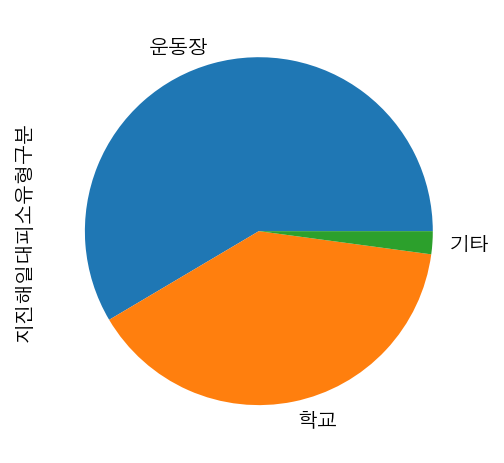

In [9]:
data = gj['지진해일대피소유형구분'].value_counts()

data.plot.pie()

plt.show()

In [17]:
pd.DataFrame(data)

,지진해일대피소유형구분
운동장,55
학교,37
기타,2


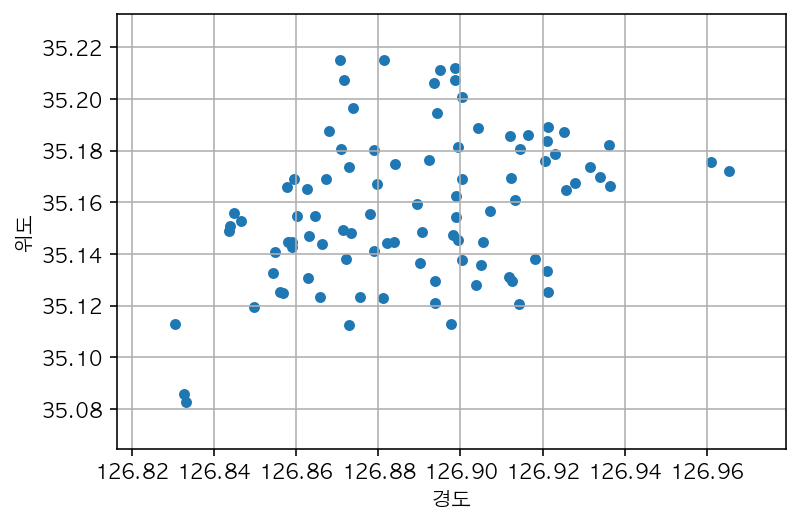

In [18]:
gj.plot.scatter(x="경도", y="위도", grid="True")

In [12]:
gj[['위도','경도']].describe(include=np.number)
coordinates = gj[['위도', '경도']]

coordinates

,위도,경도
741,35.138026,126.918254
742,35.133504,126.920998
743,35.129475,126.912499
744,35.131125,126.911755
745,35.120632,126.914204
746,35.125466,126.921242
747,35.145538,126.899516
748,35.147519,126.898173
749,35.148563,126.890540
750,35.137771,126.900445


In [13]:
import folium 
from folium import Map
from folium.plugins import HeatMap
map = Map(location=[35.1, 126.8], zoom_start=11)

# 지도에 위치 표시

for lat, lng in coordinates.values:
    marker = folium.Circle(
        location=[lat, lng],
        radius=5_00,
        weight=1,
        fill_color='#F00', #RGB
        fill_opacity=0.3, #투명도 
    )
    marker.add_to(map)

map

In [21]:
# 지도 준비

map = Map(location=[36.5, 127.5], zoom_start=7)

# 히트맵 표시

HeatMap(data=coordinates, radius=20).add_to(map)

map

NameError: name 'pylab' is not defined

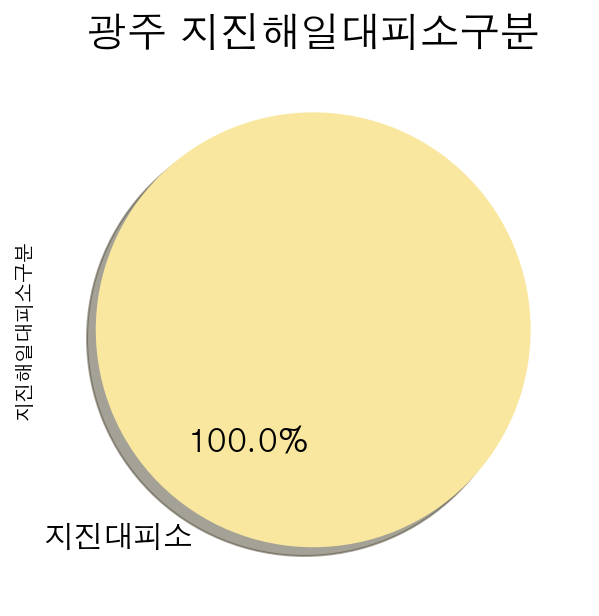

In [16]:
labels=['지진대피소', '지진해일대피소']
gj['지진해일대피소구분'].value_counts().plot.pie(labels = labels
                    ,colors= ['#F9E79F', '#AED6F1']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    # ,explode = (0,0.1) 
                    ,figsize=(5, 5)
                    ,fontsize = 15)
plt.title('광주 지진해일대피소구분', fontsize=20)

pylab.ylabel('')

In [15]:
gj.head()

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,...,해발높이,지진대피안내표지판수,긴급대피장소안내표지판수,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 29
741,광주학강초등학교 운동장,지진대피소,옥외대피소,운동장,광주광역시 남구 양림로 92 (양림동),NaN,35.138026,126.918254,7200.00,2181.0,...,NaN,NaN,NaN,NaN,광주광역시 남구청,062-607-2942,2019-04-02,3610000,광주광역시 남구,NaN
742,방림초등학교 운동장,지진대피소,옥외대피소,운동장,광주광역시 남구 큰방림길 20 (방림동),NaN,35.133504,126.920998,1952.00,591.0,...,NaN,NaN,NaN,NaN,광주광역시 남구청,062-607-2942,2019-04-02,3610000,광주광역시 남구,NaN
743,봉선중학교 운동장,지진대피소,옥외대피소,운동장,광주광역시 남구 봉선중길 14 (봉선동),NaN,35.129475,126.912499,5512.75,1670.0,...,NaN,NaN,NaN,NaN,광주광역시 남구청,062-607-2942,2019-04-02,3610000,광주광역시 남구,NaN
744,봉선초등학교 운동장,지진대피소,옥외대피소,운동장,광주광역시 남구 봉선중앙로118번길 4 (봉선동),NaN,35.131125,126.911755,3030.00,918.0,...,NaN,NaN,NaN,NaN,광주광역시 남구청,062-607-2942,2019-04-02,3610000,광주광역시 남구,NaN
745,광주불로초등학교 운동장,지진대피소,옥외대피소,운동장,광주광역시 남구 제석로80번길 58-5 (봉선동),NaN,35.120632,126.914204,6000.00,1818.0,...,NaN,NaN,NaN,NaN,광주광역시 남구청,062-607-2942,2019-04-02,3610000,광주광역시 남구,NaN


In [19]:
jrd = shelter[shelter['소재지도로명주소'].str.contains('전라')]
jrd.shape

(1066, 30)

In [20]:
jrd_ = jrd[pd.notnull(jrd['소재지지번주소'])]

jrd.shape, jrd_.shape

((1066, 30), (637, 30))

In [26]:
jrd.head()

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,...,해발높이,지진대피안내표지판수,긴급대피장소안내표지판수,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 29
713,진안고원시장 주차장,지진대피소,옥외대피소,기타,전라북도 진안군 진안읍 시장길 8-17,전라북도 진안군 진안읍 군상리 406-8,35.792674,127.428799,836.0,253.0,...,NaN,1.0,NaN,3.0,전라북도 진안군,063-430-2587,2019-05-24,4730000,전라북도 진안군,NaN
714,진안공업고등학교 운동장,지진대피소,옥외대피소,운동장,전라북도 진안군 진안읍 상역로 96,전라북도 진안군 진안읍 군상리 1054,35.800302,127.417455,2605.0,789.0,...,NaN,1.0,NaN,1.0,전라북도 진안군,063-430-2587,2019-05-24,4730000,전라북도 진안군,NaN
715,진안여자중학교 운동장,지진대피소,옥외대피소,운동장,전라북도 진안군 진안읍 어영골길 33,전라북도 진안군 진안읍 군상리 1066,35.800940,127.421128,2854.0,864.0,...,NaN,1.0,NaN,1.0,전라북도 진안군,063-430-2587,2019-05-24,4730000,전라북도 진안군,NaN
716,진안중앙초등학교 운동장,지진대피소,옥외대피소,운동장,전라북도 진안군 진안읍 학천변길 37-6,전라북도 진안군 진안읍 군상리 222,35.795329,127.435541,3962.0,1200.0,...,NaN,1.0,NaN,4.0,전라북도 진안군,063-430-2587,2019-05-24,4730000,전라북도 진안군,NaN
717,진안중학교 운동장,지진대피소,옥외대피소,운동장,전라북도 진안군 진안읍 상역로 86,전라북도 진안군 진안읍 군상리 1053-4,35.799804,127.418578,5159.0,1563.0,...,NaN,1.0,NaN,NaN,전라북도 진안군,063-430-2587,2019-05-24,4730000,전라북도 진안군,NaN


In [27]:
jrd.isnull().sum()

지진해일대피소명           0
지진해일대피소구분          0
지진해일대피소유형          0
지진해일대피소유형구분        0
소재지도로명주소           0
소재지지번주소          429
위도                 3
경도                 3
수용가능면적             0
최대수용인원수            0
지진해일대피소운영상태        0
지진해일대피소전화번호        0
부대편의시설          1026
주민대피지구명            0
주민대피지구내가구수       864
주민대피지구내거주인수      865
주민대피지구내재해약자수     987
내진적용여부             0
내진설계등급           913
해안선이격거리         1034
해발높이            1034
지진대피안내표지판수       814
긴급대피장소안내표지판수    1014
지진대피로안내표지판수     1007
관리기관명              0
관리기관전화번호         273
데이터기준일자            0
제공기관코드             0
제공기관명              0
Unnamed: 29     1066
dtype: int64

In [26]:
# from geocoder import geocode

In [25]:
# jrd2 = jrd_.sample(n=429, random_state=1)

lats = []
lngs = []

for i, index in enumerate(jrd2.index):
    print(i + 1, '-', index)
    lat, lng = geocode(jrd['소재지지번주소'][index])
    lats.append(lat)
    lngs.append(lng)

jrd2 = jrd2.assign(lat=lats, lng=lngs)

jrd2.head()

1 - 4572


NameError: name 'geocode' is not defined

In [29]:
map = Map(location=[36.5, 127.5], zoom_start=7)

data = jrd2[['lat', 'lng']].groupby(['lat', 'lng']).sum().reset_index().values.tolist()

HeatMap(data=data, radius=20).add_to(map)

for lat, lng in data:
    marker = folium.Circle(
        location=[lat, lng],
        radius=500,
        weight=1,
        fill_color='#F00',
        fill_opacity=0.3,
    )
    marker.add_to(map)

map

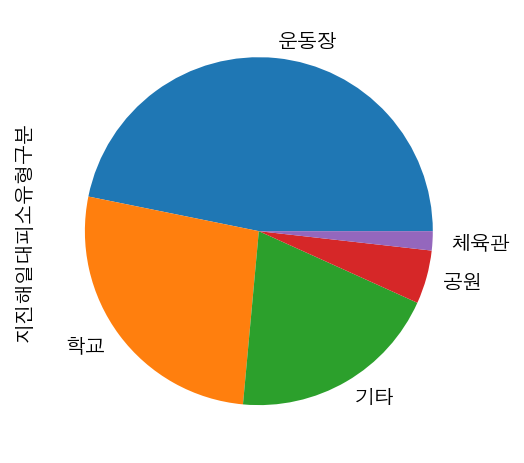

In [24]:
data = jrd['지진해일대피소유형구분'].value_counts()

data.plot.pie()

plt.show()

In [33]:
pd.DataFrame(data)

,지진해일대피소유형구분
운동장,499
학교,285
기타,210
공원,53
체육관,19


NameError: name 'pylab' is not defined

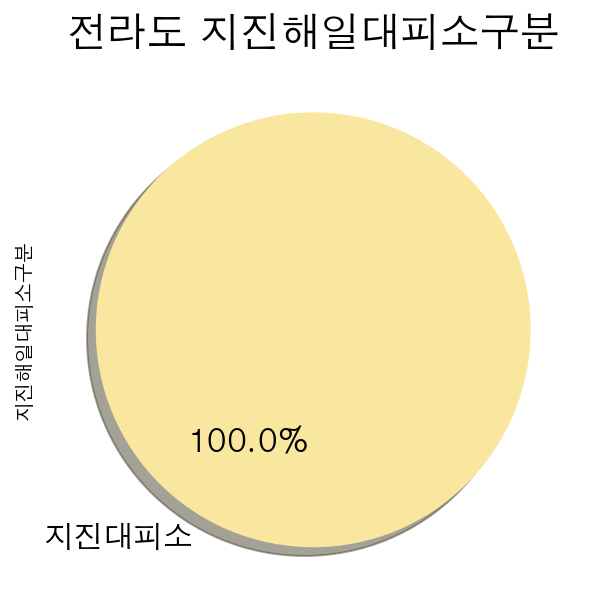

In [23]:
labels=['지진대피소', '지진해일대피소']
jrd['지진해일대피소구분'].value_counts().plot.pie(labels = labels
                    ,colors= ['#F9E79F', '#AED6F1']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    #,explode = (0,0.1) 
                    ,figsize=(5, 5)
                    ,fontsize = 15)
plt.title('전라도 지진해일대피소구분', fontsize=20)

pylab.ylabel('')